# Linear Regression model prediction

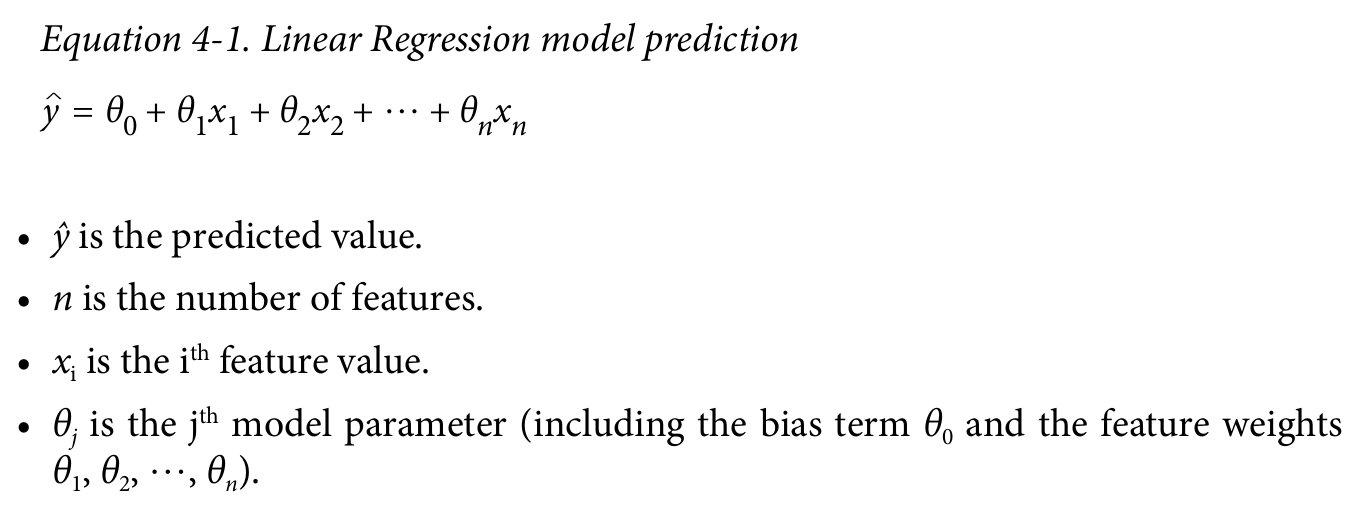

# Linear Regression model prediction (vectorized form)

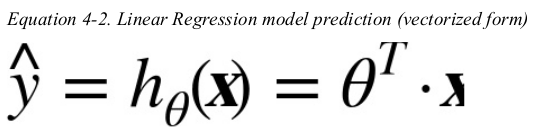

• θ is the model’s parameter vector, containing the bias term θ0 and the feature
weights θ1 to θn.

• x is the instance’s feature vector, containing x0 to xn, with x0 always equal to 1.

• θ·x is the dot product of the vectors θ and x, which is of course equal to θ0x0 +
θ1x1 + θ2x2 + ... + θnxn.

• hθ is the hypothesis function, using the model parameters θ.

#### Note
In Machine Learning, vectors are often represented as column vectors,
which are 2D arrays with a single column. If θ and x are column
vectors, then the prediction is y = θ⊺x, where θ⊺ is the
transpose of θ (a row vector instead of a column vector) and θ⊺x is
the matrix multiplication of θ⊺ and x. It is of course the same prediction,
except that it is now represented as a single-cell matrix
rather than a scalar value. In this book I will use this notation to
avoid switching between dot products and matrix multiplications.

# MSE cost function for a Linear Regression model

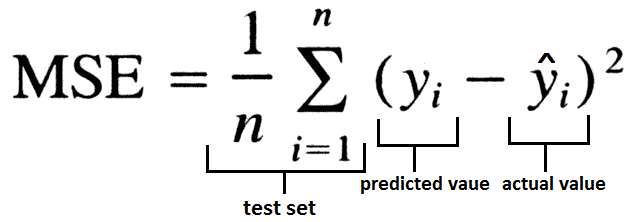

# The Normal Equation

To find the value of θ that minimizes the cost function, there is a closed-form solution
—in other words, a mathematical equation that gives the result directly. This is called
the Normal Equation

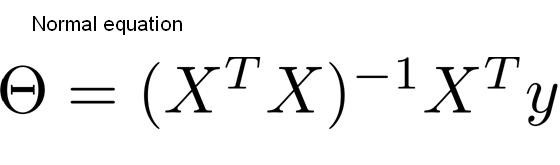

• θ is the value of θ that minimizes the cost function.

• y is the vector of target values containing y(1) to y(m).

# Let’s generate some linear-looking data to test this equation

In [ ]:
import numpy as np

In [ ]:
x = 2 * np.random.rand(100,1)
y = 4 + 3 * x + np.random.randn(100,1)

rand() returns random values between 0 and 1. The random values would follow a uniform distribution and hence the mean value would be 0.5


randn() returns random values between -infinity and +inifinity. The random values would follow a normal distribution with a mean value 0 and a standard deviation 1

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(x,y,'.')

# Now let’s compute θ using the Normal Equation.

We will use the inv() function from
NumPy’s linear algebra module (np.linalg) to compute the inverse of a matrix, and
the dot() method for matrix multiplication

In [ ]:
X_b = np.c_[np.ones((100, 1)), x] # add x0 = 1 to each instance

In [ ]:
theta_best = np.linalg.inv(X_b .T.dot(X_b)).dot(X_b.T).dot(y)

In [ ]:
theta_best

# Now we can make predictions using θ

In [ ]:
x_new = np.array([[0],[2]])

In [ ]:
X_new_b = np.c_[np.ones((2, 1)), x_new] # add x0 = 1 to each instance

why add  x0 = 1 

remeber that dot two vector  [4 2].[1 3]

result = 4 * 1 + 2 * 3

so we need a multipulication number that does not affect the original value, for θ0

In [ ]:
y_predict = X_new_b.dot(theta_best)

In [ ]:
y_predict

In [ ]:
plt.plot(x_new, y_predict, "r-")
plt.plot(x, y, "b.")
plt.show()

Now you understand the Linear Regression , you can using Linear Regression from Scikit-Learn

# Linear Regression using Scikit-Learn is simple

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin_reg = LinearRegression()

In [ ]:
lin_reg.fit(x,y)

In [ ]:
lin_reg.intercept_, lin_reg.coef_

In [ ]:
if you have different value review your equation

wonderful

if you have a different value review your equation to calculate Normal Equation

In [ ]:
lin_reg.predict(x_new)

wonderful

if you have a different value review your equation to calculate  make predictions using θ

# Computational Complexity

The Normal Equation computes the inverse of X⊺ X, which is an (n + 1) × (n + 1)
matrix (where n is the number of features). The computational complexity of inverting
such a matrix is typically about O(n2.4) to O(n3), depending on the implementation. In
other words, if you double the number of features, you multiply the computation
time by roughly 22.4 = 5.3 to 23 = 8 .


The SVD approach used by Scikit-Learn’s LinearRegression class is about O(n2). If
you double the number of features, you multiply the computation time by roughly 4.

## Note

Both the Normal Equation and the SVD approach get very slow
when the number of features grows large (e.g., 100,000). On the
positive side, both are linear with regard to the number of instances
in the training set (they are O(m)), so they handle large training
sets efficiently, provided they can fit in memory.

# Now we will look at a very different way to train a Linear Regression model

which is better suited for cases where there are a large number of features or too many training
instances to fit in memory

### Gradient Descent

Gradient Descent is a generic optimization algorithm capable of finding optimal solutions
to a wide range of problems. The general idea of Gradient Descent is to tweak
parameters iteratively in order to minimize a cost function.

Suppose you are lost in the mountains in a dense fog, and you can only feel the slope
of the ground below your feet. A good strategy to get to the bottom of the valley
quickly is to go downhill in the direction of the steepest slope. This is exactly what
Gradient Descent does: it measures the local gradient of the error function with
regard to the parameter vector θ, and it goes in the direction of descending gradient.
Once the gradient is zero, you have reached a minimum!

Concretely, you start by filling θ with random values (this is called random initialization).
Then you improve it gradually, taking one baby step at a time, each step
attempting to decrease the cost function (e.g., the MSE), until the algorithm converges
to a minimum

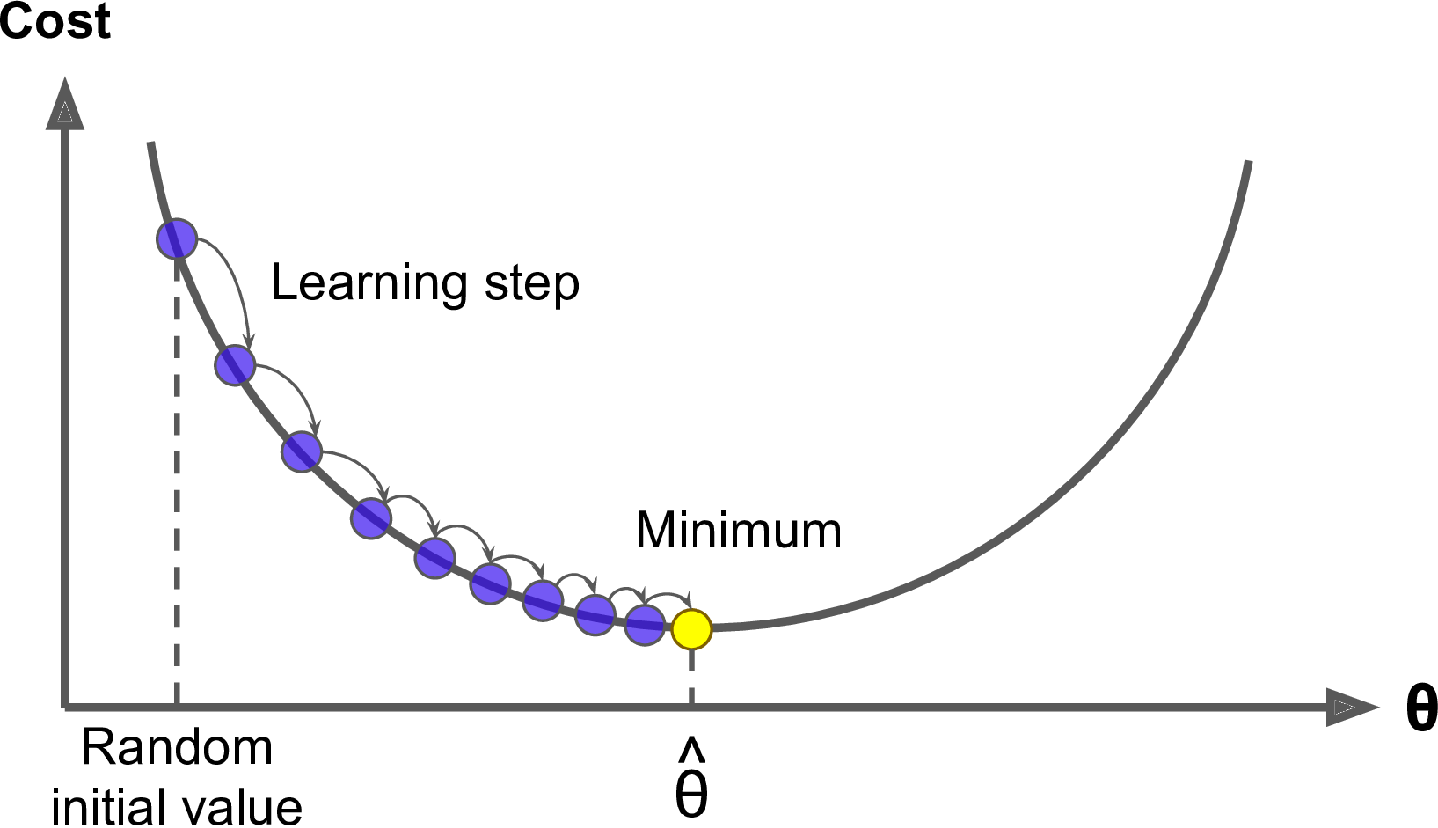

In this depiction of Gradient Descent, the model parameters are initialized
randomly and get tweaked repeatedly to minimize the cost function; the learning step
size is proportional to the slope of the cost function, so the steps gradually get smaller as
the parameters approach the minimum.

#### An important parameter in Gradient Descent is the size 
of the steps, determined by the learning rate hyperparameter. 

####  If the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time

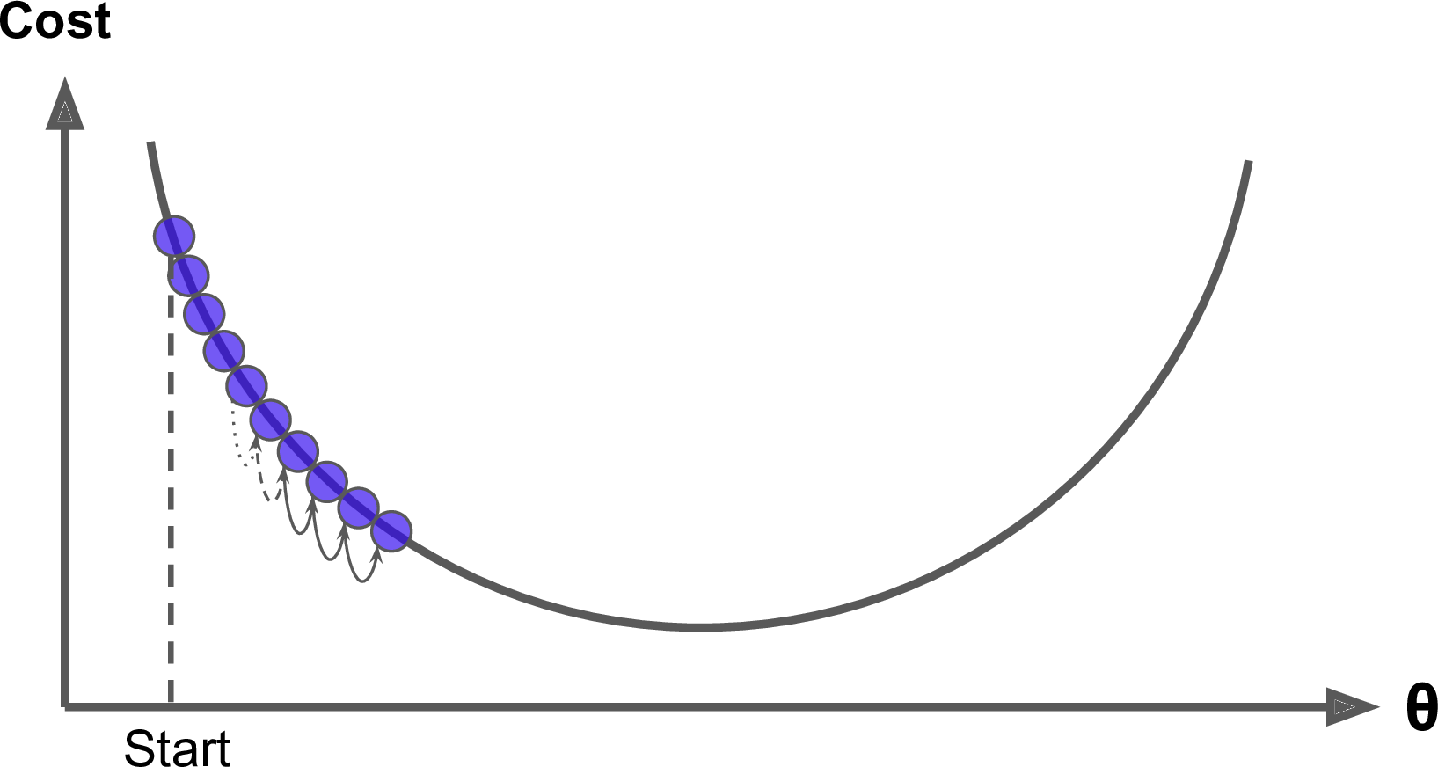

#### On the other hand, if the learning rate is too high, you might jump across the valley and end up on the other side, possibly even higher up than you were before.
This might make the algorithm diverge, with larger and larger values, failing to find a good
solution

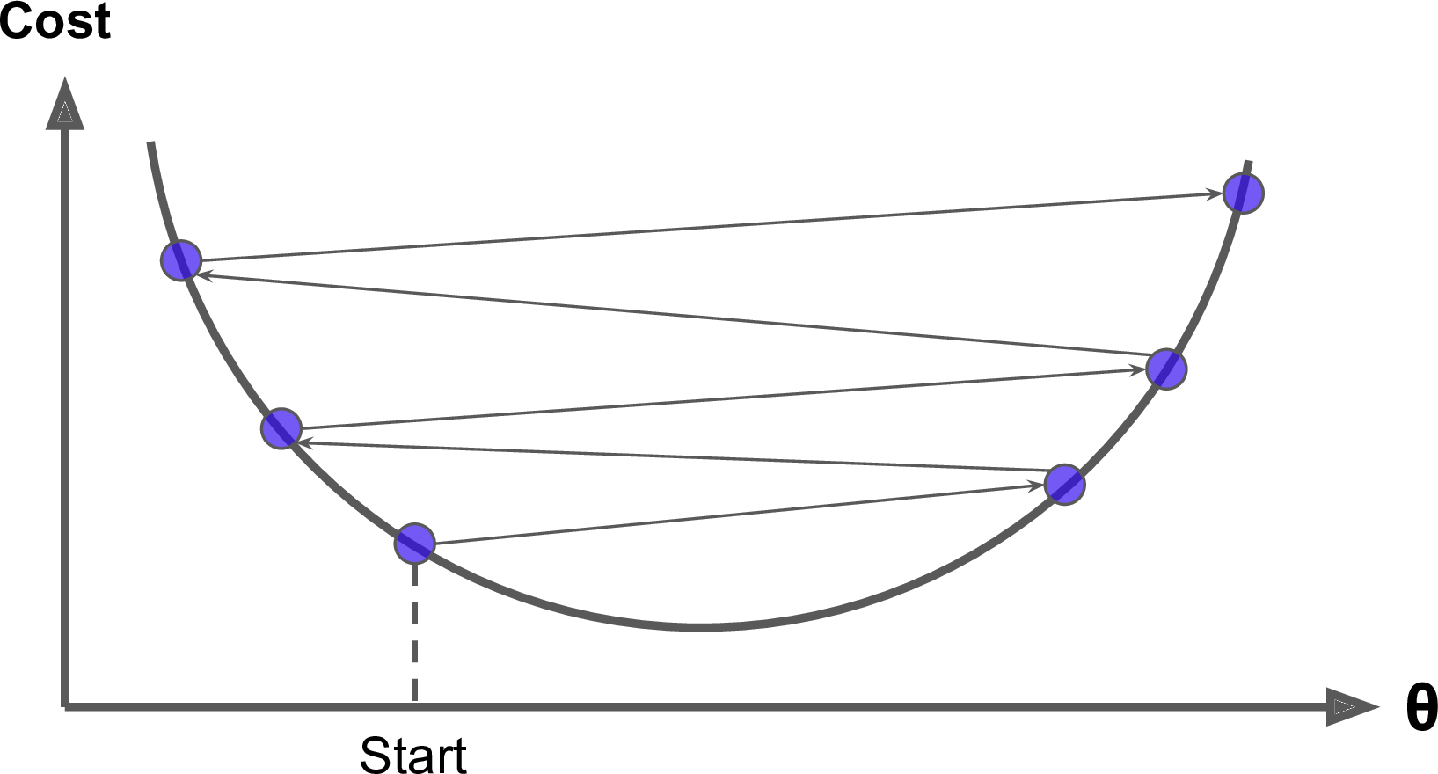

Finally, not all cost functions look like nice, regular bowls. There may be holes, ridges,
plateaus, and all sorts of irregular terrains, making convergence to the minimum difficult.
Figure  shows the two main challenges with Gradient Descent. If the random
initialization starts the algorithm on the left, then it will converge to a local
minimum, which is not as good as the global minimum. If it starts on the right, then it
will take a very long time to cross the plateau. And if you stop too early, you will
never reach the global minimum.

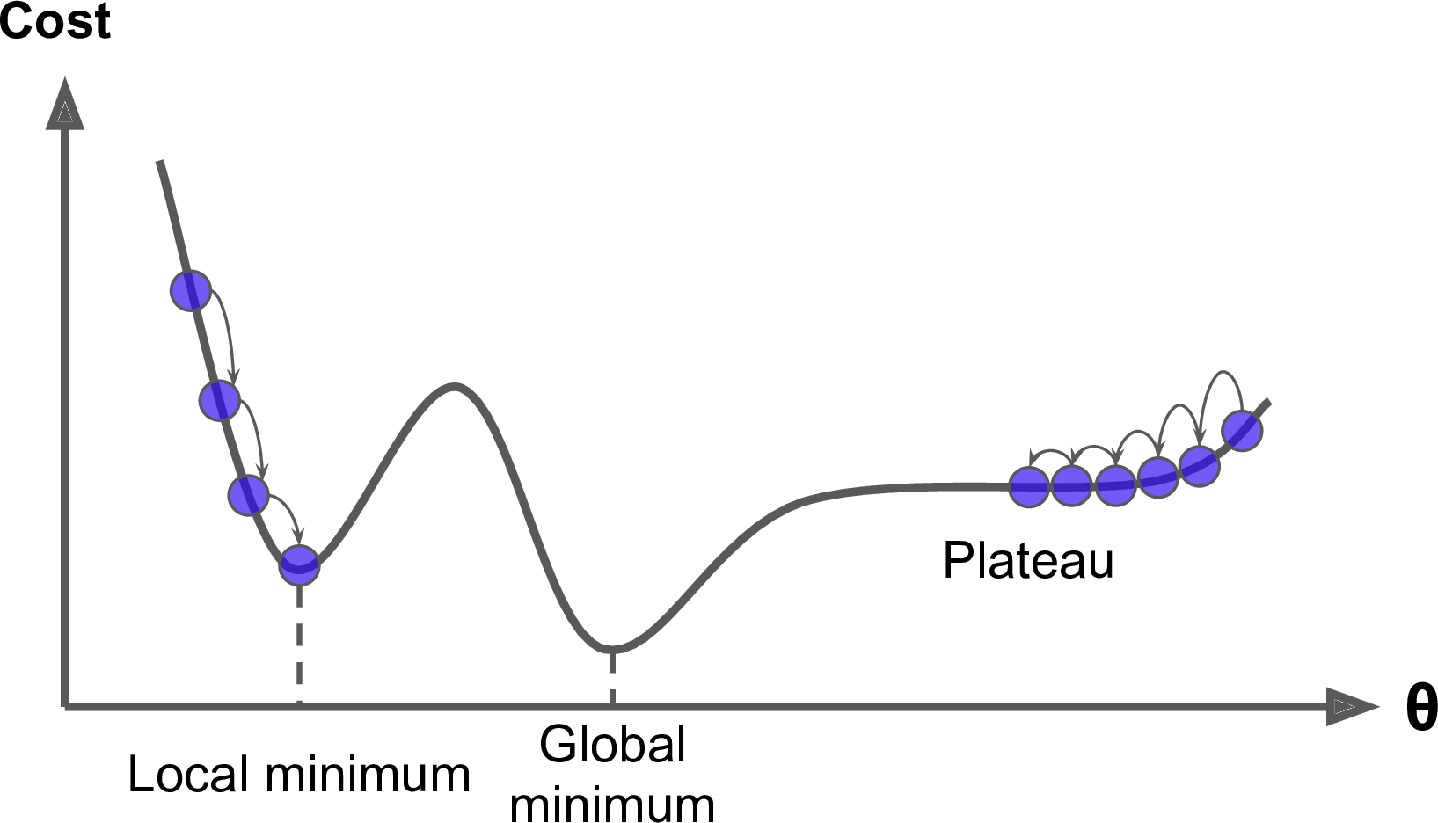

Fortunately, the MSE cost function for a Linear Regression model happens to be a
##### convex function, 
which means that if you pick any two points on the curve, the line
segment joining them never crosses the curve. This implies that there are no local
minima, just one global minimum. It is also a continuous function with a slope that
never changes abruptly.3 These two facts have a great consequence: Gradient Descent
is guaranteed to approach arbitrarily close the global minimum (if you wait long
enough and if the learning rate is not too high).

#### In fact, the cost function has the shape of a bowl, but it can be an elongated bowl if the features have very different scales.
Figure shows Gradient Descent on a training
set where features 1 and 2 have the same scale (on the left), and on a training set
where feature 1 has much smaller values than feature 2 (on the right)

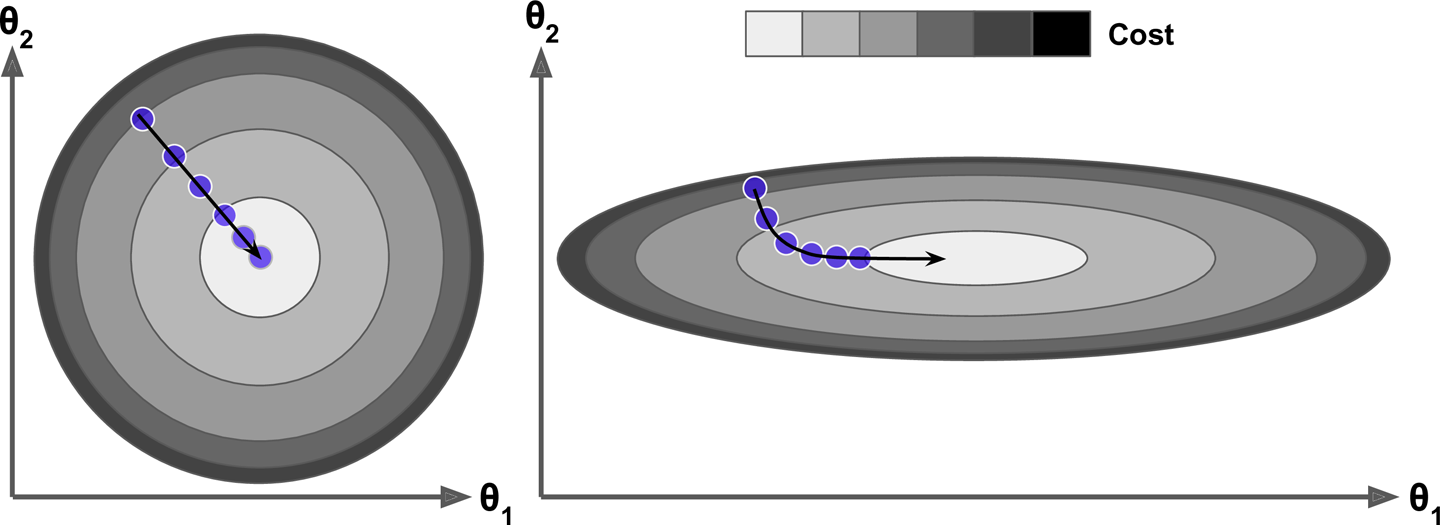

As you can see, on the left the Gradient Descent algorithm goes straight toward the
minimum, thereby reaching it quickly, whereas on the right it first goes in a direction
almost orthogonal to the direction of the global minimum, and it ends with a long
march down an almost flat valley. It will eventually reach the minimum, but it will
take a long time.

This diagram also illustrates the fact that training a model means searching for a
combination of model parameters that minimizes a cost function (over the training
set). It is a search in the model’s parameter space: the more parameters a model has,
the more dimensions this space has, and the harder the search is: searching for a needle
in a 300-dimensional haystack is much trickier than in 3 dimensions. Fortunately,
since the cost function is convex in the case of Linear Regression, the needle is simply
at the bottom of the bowl.

## Note 

When using Gradient Descent, you should ensure that all features
have a similar scale (e.g., using Scikit-Learn’s StandardScaler
class), or else it will take much longer to converge

# Batch Gradient Descent

To implement Gradient Descent, you need to compute the gradient of the cost function
with regard to each model parameter θj. In other words, you need to calculate
how much the cost function will change if you change θj just a little bit.

### Partial derivatives of the cost function

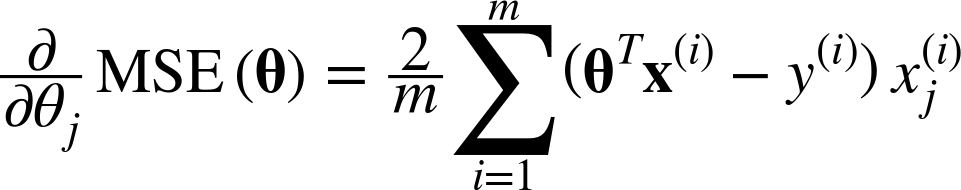

### Gradient vector of the cost function

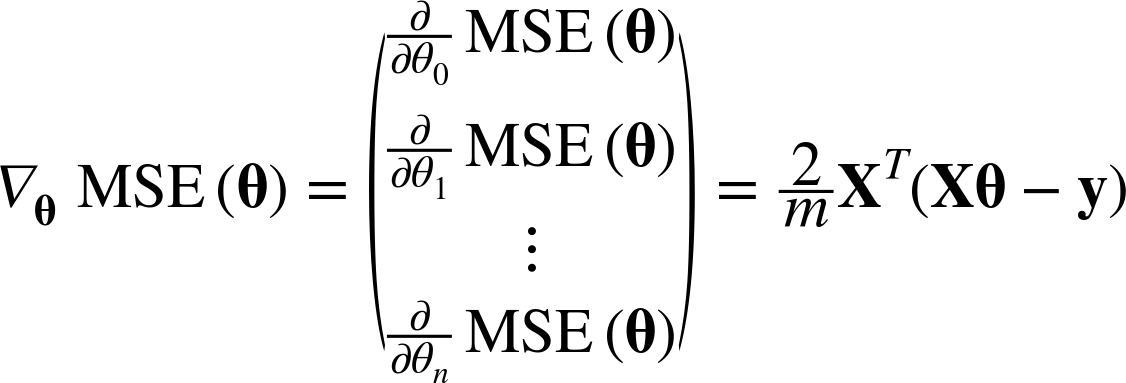

#### Notice
that this formula involves calculations over the full training
set X, at each Gradient Descent step! This is why the algorithm is
called Batch Gradient Descent: it uses the whole batch of training
data at every step (actually, Full Gradient Descent would probably
be a better name). As a result it is terribly slow on very large training
sets (but we will see much faster Gradient Descent algorithms
shortly). However, Gradient Descent scales well with the number of
features; training a Linear Regression model when there are hundreds
of thousands of features is much faster using Gradient
Descent than using the Normal Equation or SVD decomposition

Once you have the gradient vector, which points uphill, just go in the opposite direction
to go downhill. This means subtracting ∇θMSE(θ) from θ. This is where the
learning rate η comes into play:5 multiply the gradient vector by η to determine the
size of the downhill step

### Gradient Descent step

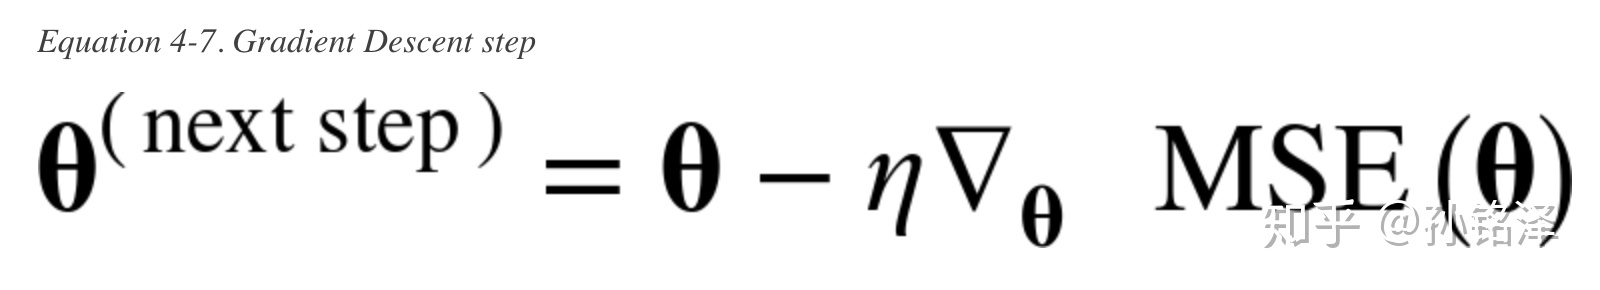

### Let’s look at a quick implementation of this algorithm

In [135]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [136]:
theta

array([[3.9093518 ],
       [3.06024676]])

Hey, that’s exactly what the Normal Equation found! Gradient Descent worked perfectly.
But what if you had used a different learning rate eta? try with your self

On the left, the learning rate is too low: the algorithm will eventually reach the solution,
but it will take a long time. In the middle, the learning rate looks pretty good: in
just a few iterations, it has already converged to the solution. On the right, the learning
rate is too high: the algorithm diverges, jumping all over the place and actually
getting further and further away from the solution at every step.

To find a good learning rate, you can use grid search . However, you
may want to limit the number of iterations so that grid search can eliminate models
that take too long to converge.

You may wonder how to set the number of iterations. If it is too low, you will still be
far away from the optimal solution when the algorithm stops; but if it is too high, you
will waste time while the model parameters do not change anymore. A simple solution
is to set a very large number of iterations but to interrupt the algorithm when the
gradient vector becomes tiny—that is, when its norm becomes smaller than a tiny
number ϵ (called the tolerance)—because this happens when Gradient Descent has
(almost) reached the minimum.

###                              Convergence Rate
When the cost function is convex and its slope does not change abruptly (as is the
case for the MSE cost function), Batch Gradient Descent with a fixed learning rate
will eventually converge to the optimal solution, but you may have to wait a while: it
can take O(1/ϵ) iterations to reach the optimum within a range of ϵ, depending on the
shape of the cost function. If you divide the tolerance by 10 to have a more precise
solution, then the algorithm may have to run about 10 times longer.

# Stochastic Gradient Descent

The main problem with Batch Gradient Descent is the fact that it uses the whole
training set to compute the gradients at every step, which makes it very slow when
the training set is large. At the opposite extreme, Stochastic Gradient Descent picks a
random instance in the training set at every step and computes the gradients based
only on that single instance. Obviously, working on a single instance at a time makes
the algorithm much faster because it has very little data to manipulate at every iteration.
It also makes it possible to train on huge training sets, since only one instance
needs to be in memory at each iteration (Stochastic GD can be implemented as an
out-of-core algorithm

On the other hand, due to its stochastic (i.e., random) nature, this algorithm is much
less regular than Batch Gradient Descent: instead of gently decreasing until it reaches
the minimum, the cost function will bounce up and down, decreasing only on average.
Over time it will end up very close to the minimum, but once it gets there it will
continue to bounce around, never settling down (see Figure). So once the algorithm
stops, the final parameter values are good, but not optimal.

When the cost function is very irregular , this can actually help the
algorithm jump out of local minima, so Stochastic Gradient Descent has a better
chance of finding the global minimum than Batch Gradient Descent does.


Therefore, randomness is good to escape from local optima, but bad because it means
that the algorithm can never settle at the minimum. One solution to this dilemma is
to gradually reduce the learning rate. The steps start out large (which helps make
quick progress and escape local minima), then get smaller and smaller, allowing the
algorithm to settle at the global minimum. This process is akin to simulated annealing,
an algorithm inspired from the process in metallurgy of annealing, where molten
metal is slowly cooled down. The function that determines the learning rate at each
iteration is called the learning schedule. If the learning rate is reduced too quickly, you
may get stuck in a local minimum, or even end up frozen halfway to the minimum. If
the learning rate is reduced too slowly, you may jump around the minimum for a
long time and end up with a suboptimal solution if you halt training too early.

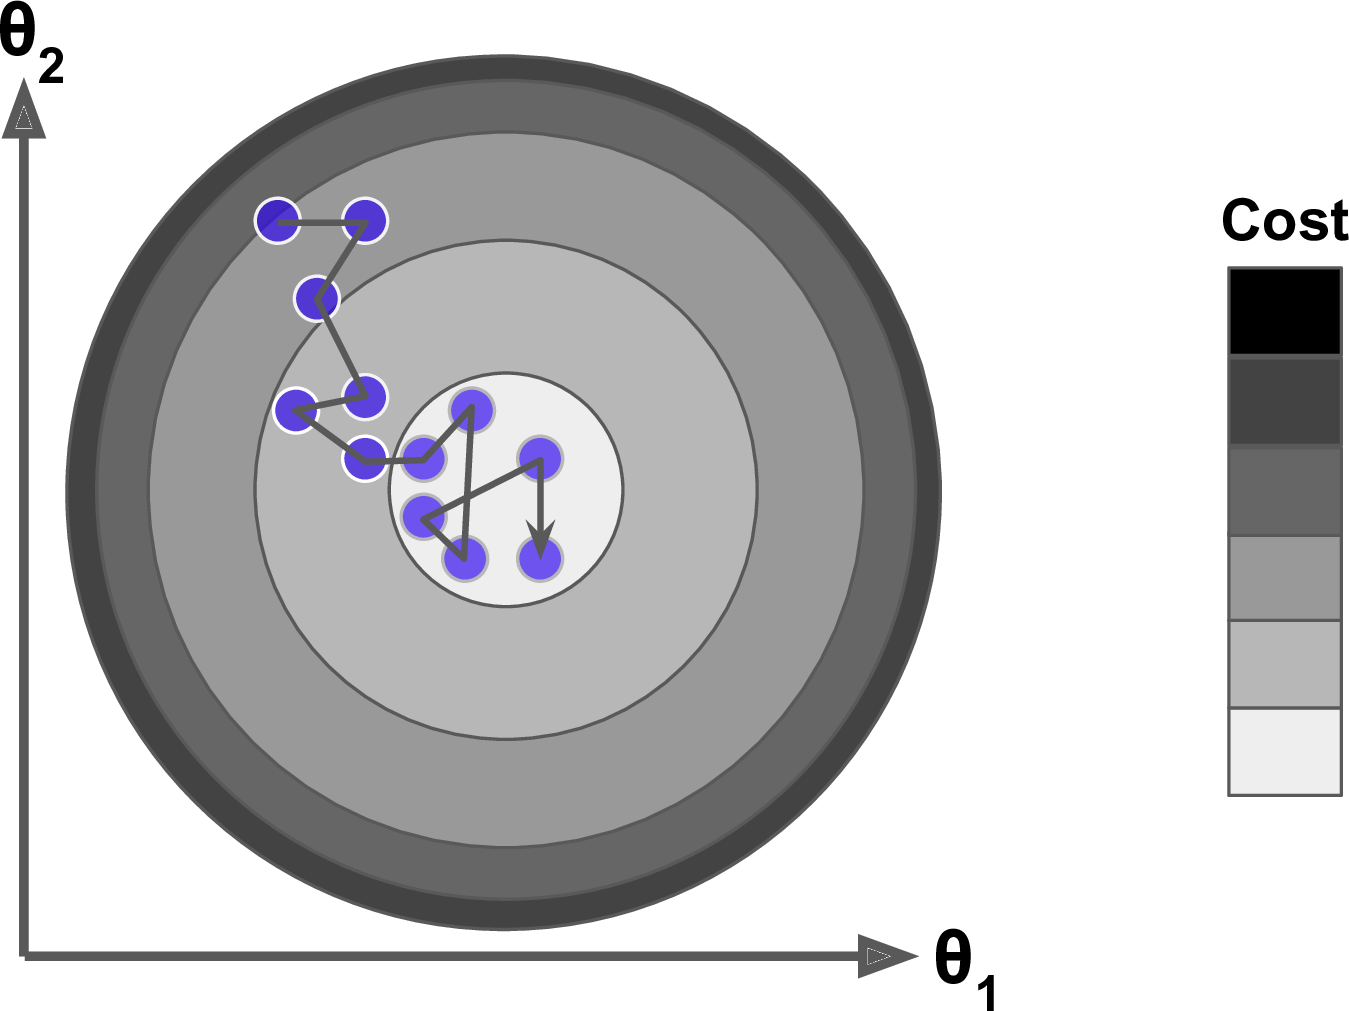

## implements Stochastic Gradient Descent using a simple learning schedule

In [126]:
n_epochs = 50
t0,t1 = 5, 50 # learning schedule hyperparameters

In [127]:
def learning_schedule(t):
    return t0 / (t + t1)

In [128]:
theta = np.random.randn(2,1) #random initialization

In [129]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [130]:
theta 

array([[3.9421249 ],
       [3.07556021]])

By convention we iterate by rounds of m iterations; each round is called an epoch.
While the Batch Gradient Descent code iterated 1,000 times through the whole training
set, this code goes through the training set only 50 times and reaches a pretty
good solution

## Note

When using Stochastic Gradient Descent, the training instances
must be independent and identically distributed (IID) to ensure
that the parameters get pulled toward the global optimum, on average.
A simple way to ensure this is to shuffle the instances during
training (e.g., pick each instance randomly, or shuffle the training
set at the beginning of each epoch). If you do not shuffle the
instances—for example, if the instances are sorted by label—then
SGD will start by optimizing for one label, then the next, and so on,
and it will not settle close to the global minimum.

## To perform Linear Regression using Stochastic GD with Scikit-Learn,

you can use the SGDRegressor class, which defaults to optimizing the squared error cost function.
The following code runs for maximum 1,000 epochs or until the loss drops by less
than 0.001 during one epoch (max_iter=1000, tol=1e-3). It starts with a learning rate
of 0.1 (eta0=0.1), using the default learning schedule (different from the preceding
one). Lastly, it does not use any regularization (penalty=None; more details on this
shortly):

In [137]:
from sklearn.linear_model import SGDRegressor

In [138]:
sgd_reg = SGDRegressor (max_iter = 1000 ,tol=1e-3, penalty=None, eta0=0.1)

In [146]:
sgd_reg.fit(x, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [147]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.90749024]), array([3.08073119]))

## Mini-batch Gradient Descent

The last Gradient Descent algorithm we will look at is called Mini-batch Gradient
Descent. It is simple to understand once you know Batch and Stochastic Gradient
Descent: at each step, instead of computing the gradients based on the full training set
(as in Batch GD) or based on just one instance (as in Stochastic GD), Mini-batch GD
computes the gradients on small random sets of instances called mini-batches. The
main advantage of Mini-batch GD over Stochastic GD is that you can get a performance
boost from hardware optimization of matrix operations, especially when using GPUs.

The algorithm’s progress in parameter space is less erratic than with Stochastic GD,
especially with fairly large mini-batches. As a result, Mini-batch GD will end up walking
around a bit closer to the minimum than Stochastic GD—but it may be harder for
it to escape from local minima (in the case of problems that suffer from local minima,
unlike Linear Regression). Figure  shows the paths taken by the three Gradient
Descent algorithms in parameter space during training. They all end up near the
minimum, but Batch GD’s path actually stops at the minimum, while both Stochastic
GD and Mini-batch GD continue to walk around. However, don’t forget that Batch
GD takes a lot of time to take each step, and Stochastic GD and Mini-batch GD
would also reach the minimum if you used a good learning schedule.

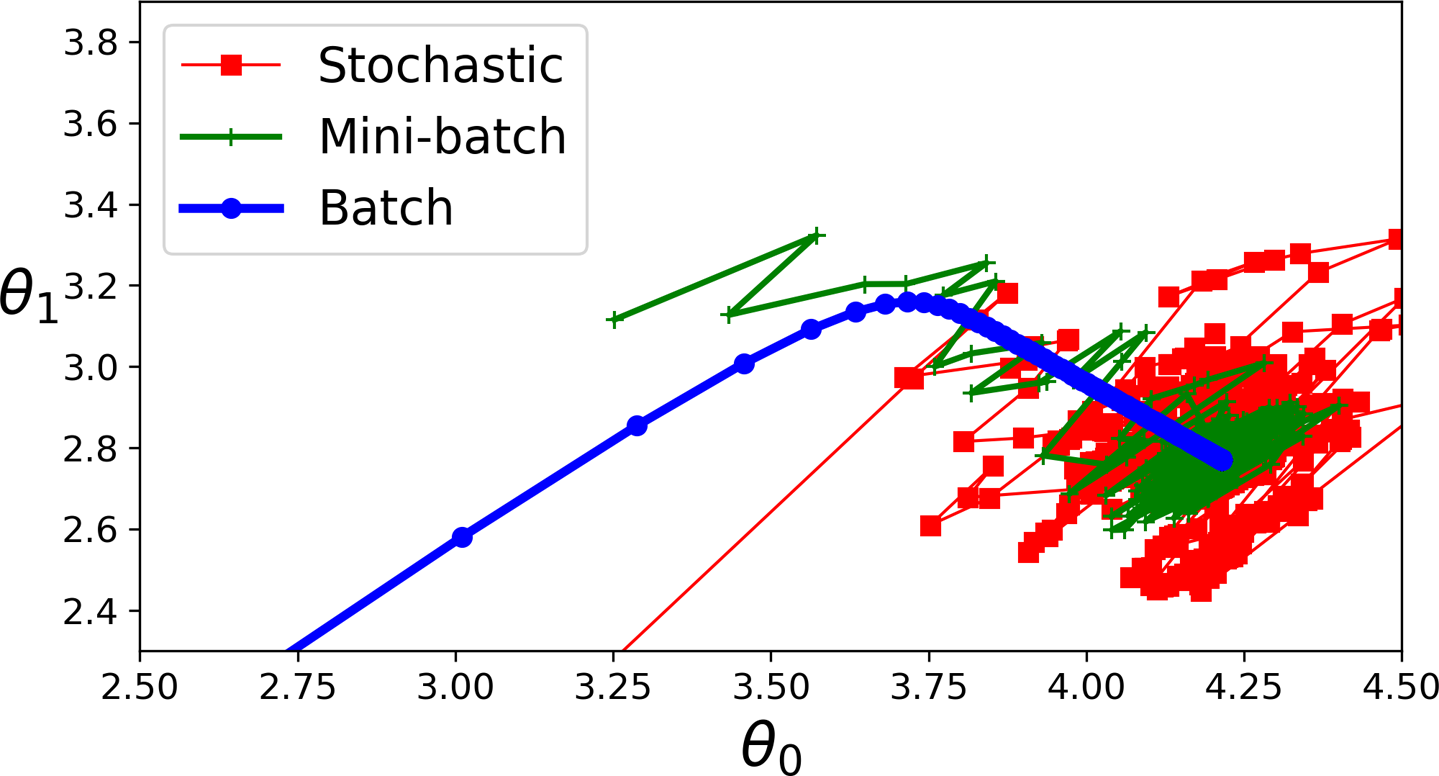

Comparison of algorithms for Linear Regression
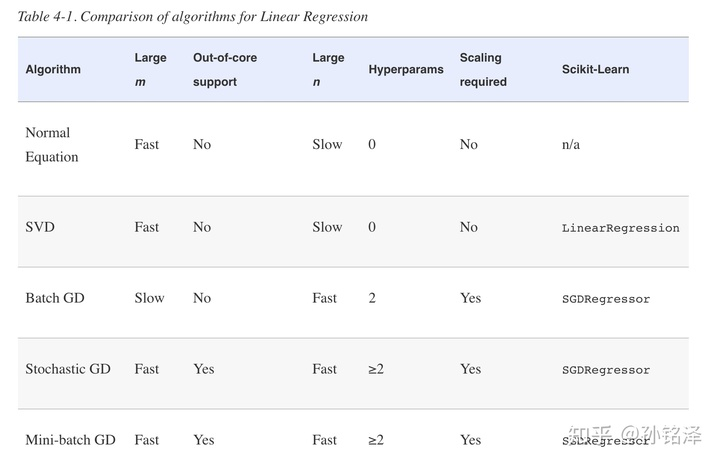